# Exploratory data analysis (EDA)
In this time series analysis, EDA is used to take insights from the data to detect the patterns using four types EDA, these are univariate non-graphical, multivariate non- graphical, univariate graphical, and multivariate graphical.

## Importing the relevant libraries

In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
import warnings
warnings.filterwarnings('ignore')
import logging
logging.basicConfig(level=os.environ.get("LOGLEVEL", "INFO"))

In [163]:
#we will need the following libraries and modules
import numpy as np
import pandas as pd
import matplotlib
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

#import category_encoders as ce

import warnings
warnings.filterwarnings('ignore')
import dvc.api

### Importing scripts & modules 

In [162]:
from utility import ReadData
from  Preprocessing import dataPreprocess
from logger import App_Logger
from data_info import DataInfo
import plotfunction
import util as u

### Initializing logging functionality

In [23]:
logger = App_Logger("EDA_Logs.log").get_app_logger()

### Loading the data

In [49]:
train = "../data/train.csv"
test = "../data/test.csv"
store = "../data/store.csv"
sample= "../data/sample_submission.csv"

In [50]:
# the class has utility function we are going to use
helper = ReadData()

In [51]:
# we use our helper function to read csv data
df_train = helper.read_csv(train)
df_test = helper.read_csv(test)
df_store = helper.read_csv(store)
df_sample = helper.read_csv(sample)

>> file read as csv
>> file read as csv
>> file read as csv
>> file read as csv


# Assessing Data

## 1. Train data

In [52]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [54]:
#Checking info
df_trains = DataInfo(df_train)

In [55]:
# shape
df_trains.shape_df()

Dataframe contains 1017209 rows and 9 columns


In [12]:
#satat
df_trains.describe_stat()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [56]:
# info
df_trains.detail_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None


In [13]:
# null percentage
df_trains.null_percentage()

Dataframe contains null values of 0.0% out of the given dataset


In [57]:
# null counts
df_trains.get_count_null()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


**This train dataset is versioned as ver_2**

In [35]:
# featching based on version
def get_data(tag, 
            path='data/train.csv', 
            repo ='C:/Users/Ekubay/Documents/Rossmann_Pharmaceutical_sales_Prediction'
):
    rev = tag
    data_url = dvc.api.get_url(path=path, repo=repo, rev=rev)
    df = pd.read_csv(data_url)
    return df

In [34]:
train_vdf = get_data('v1')

## 2. Test data

In [18]:
# head
df_test.head(2)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0


In [59]:
#initializing info class 
df_tests = DataInfo(df_test)

In [60]:
## checking shape
df_tests.detail_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB
None


In [21]:
# checking null
df_tests.get_count_null()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64


In [61]:
#shape
df_tests.shape_df()

Dataframe contains 41088 rows and 8 columns


## 3. Store data

In [62]:
df_store.head(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [63]:
#initializing
df_stores = DataInfo(df_store)

In [42]:
# shape
df_stores.shape_df()

Dataframe contains 1115 rows and 10 columns


In [64]:
# checking against null value
df_stores.get_count_null()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [24]:
# info
df_tests.detail_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB
None


## 4. Sample_submission data

In [43]:
# checking using head()
df_sample.head(2)

,Id,Sales
0,1,0
1,2,0


In [44]:
# initializing 
df_samples = DataInfo(df_sample)

In [27]:
# info shape
df_samples.shape_df()

Dataframe contains 41088 rows and 2 columns


In [35]:
# checking inof
df_samples.detail_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      41088 non-null  int64
 1   Sales   41088 non-null  int64
dtypes: int64(2)
memory usage: 642.1 KB
None


In [28]:
# checking null
df_samples.get_count_null()

Id       0
Sales    0
dtype: int64


## Field Ddescriptions 

__Id__ - an Id that represents a (Store, Date) duple within the test set

__Store__ - a unique Id for each store

__Sales__ - the turnover for any given day (this is what you are predicting)

__Customers__ - the number of customers on a given day

__Open__ - an indicator for whether the store was open: 0 = closed, 1 = open

__StateHoliday__ - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

__SchoolHoliday__ - indicates if the (Store, Date) was affected by the closure of public schools

__StoreType__ - differentiates between 4 different store models: a, b, c, d

__Assortment__ - describes an assortment level: a = basic, b = extra, c = extended. Read more about assortment here

__CompetitionDistance__ - distance in meters to the nearest competitor store

__CompetitionOpenSince[Month/Year]__ - gives the approximate year and month of the time the nearest competitor was opened

__Promo__ - indicates whether a store is running a promo on that day

__Promo2__ - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

__Promo2Since[Year/Week]__ - describes the year and calendar week when the store started participating in Promo2

__PromoInterval__ - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


# Merging 'train.csv' and 'store.csv'
- Both dataset have common column 'store' 
- use column to merge store into train dataset

In [65]:
train = pd.read_csv('../data/train.csv',  parse_dates=[2],index_col = 'Date')
store = pd.read_csv("../data/store.csv", 
                    low_memory = False)

train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear
train['Dates']=train.apply(lambda x:'%s-%s-%s' % (x['Year'],x['Month'],x['Day']),axis=1)
train['Dates']=pd.to_datetime(train['Dates'])

train_store = pd.merge(train, store, how = 'inner', on = 'Store')

#data_frame = pd.read_csv("train.csv")
train = pd.read_csv('../data/train.csv',  parse_dates=[2],index_col = 'Date')
store = pd.read_csv("../data/store.csv", 
                    low_memory = False)



In [67]:
# checking 
train_store.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Dates,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,2015-07-31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,5020,546,1,1,0,1,2015,7,...,2015-07-30,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,4782,523,1,1,0,1,2015,7,...,2015-07-29,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,5011,560,1,1,0,1,2015,7,...,2015-07-28,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,6102,612,1,1,0,1,2015,7,...,2015-07-27,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [68]:
train_store.shape

(1017209, 22)

# Cleaning 

In [69]:
#Checkinig the missing values
train_store.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
Year                              0
Month                             0
Day                               0
WeekOfYear                        0
Dates                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

__Competition Distance__

Before deciding how to treat this,we know there are infinite ways of filling missing values.
The most common and simplistic approach is to fill it with either the mean or the median of this variable.

In [70]:
# checking null
train_store[pd.isnull(train_store.CompetitionDistance)].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Dates,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
263244,291,5,10052,973,1,1,0,1,2015,7,...,2015-07-31,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
263245,291,4,9030,883,1,1,0,1,2015,7,...,2015-07-30,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
263246,291,3,8204,814,1,1,0,1,2015,7,...,2015-07-29,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
263247,291,2,10374,943,1,1,0,1,2015,7,...,2015-07-28,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
263248,291,1,11692,1086,1,1,0,1,2015,7,...,2015-07-27,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN


In [15]:
# droping 
df_store_check_distribution=train_store.drop(train_store[pd.isnull(train_store.CompetitionDistance)].index)
df_store_check_distribution.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Dates,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,2015-07-31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,5020,546,1,1,0,1,2015,7,...,2015-07-30,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,4782,523,1,1,0,1,2015,7,...,2015-07-29,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,5011,560,1,1,0,1,2015,7,...,2015-07-28,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,6102,612,1,1,0,1,2015,7,...,2015-07-27,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


**Since the data is time series it is not possible to use the mean or median**
- we will use fill

In [72]:
#train_store['CompetitionDistance'].fillna(train_store['CompetitionDistance'].median(), inplace = True)
train_store['CompetitionDistance'] = train_store['CompetitionDistance'].fillna(method='ffill')

__CompetitionOpenSinceMonth and CompetitionOpenSinceYear__

Since we have no information whatsoever on those missing values and no accurate way of filling those values.
So those fields are going to be assigned to 0 .

In [73]:
# filling with 0
train_store.CompetitionOpenSinceMonth.fillna(0, inplace = True)
train_store.CompetitionOpenSinceYear.fillna(0,inplace=True)

__Promo2SinceWeek, Promo2SinceYear and PromoInterval__ 

This case is pretty straighforward, all the missing values comes from fields where Promo2=0 which means there are no continuous promotional activities for those stores.
Having no promotion means those fields have to be 0 as well since they are linked to Promo2.


In [74]:
# asignning 0
train_store.Promo2SinceWeek.fillna(0,inplace=True)
train_store.Promo2SinceYear.fillna(0,inplace=True)
train_store.PromoInterval.fillna(0,inplace=True)

In [78]:
#  checking null in the train_score datasets
train_storeInfo = DataInfo(train_store)
train_storeInfo.null_percentage()

Dataframe contains null values of 0.0% out of the given dataset


In [79]:
train_storeInfo.get_count_null()

Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Year                         0
Month                        0
Day                          0
WeekOfYear                   0
Dates                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


In [22]:
# statistical description
train_storeInfo.describe_stat()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2.013832e+03,5.846762e+00,1.570279e+01,2.361551e+01,5.422034e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.773960e-01,3.326097e+00,8.787638e+00,1.443338e+01,7.706913e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,1.100000e+01,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,2.200000e+01,2.330000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,3.500000e+01,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,5.200000e+01,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


## Reading the description report 

### Sales

The __minimum sale__ is 0

The __maximum sale__ is 41551.00

25% of sale is below 3727.000

50% of sale is below 5744.000

75% of sale is below 7856.000

### Customers

The __minimum customer__ is 0

The __maximum customer__ is 7388

25% of customer is below 405

50% of customer is below 609

75% of customer is below 837

In [80]:
# copy
clean_trainScore_df = train_store.copy()

## Distribution 

### Sales Distribution

Text(0.5, 1.0, 'Sales Distribution')

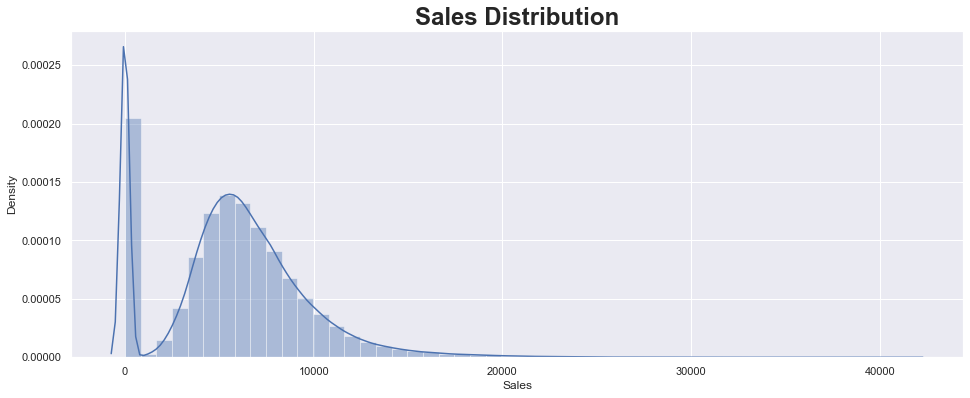

In [81]:
# using displot
plt.figure(figsize=(16, 6))
sns.distplot(clean_trainScore_df['Sales']).set_title('Sales Distribution',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

In [82]:
#group by storetype
clean_trainScore_df.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,551627.0,5738.179710,3964.028134,0.0,3508.0,5618.0,7860.00,41551.0
b,15830.0,10058.837334,5280.525506,0.0,6227.0,9025.5,13082.75,38722.0
c,136840.0,5723.629246,3721.700886,0.0,3789.0,5766.0,7849.00,31448.0
d,312912.0,5641.819243,3473.393781,0.0,3986.0,5826.0,7691.00,38037.0


**StoreType B shows better average of Sales among all others.**

In [83]:
# customers and sales grouped by storetype
clean_trainScore_df.groupby('StoreType')['Customers', 'Sales'].sum()

,Customers,Sales
StoreType,,
a,363541434,3165334859
b,31465621,159231395
c,92129705,783221426
d,156904995,1765392943


### Important things from the above 
- store `a` has the highest sales and customers
- store `d` has the second highest sales
- store `b` has the least sales 

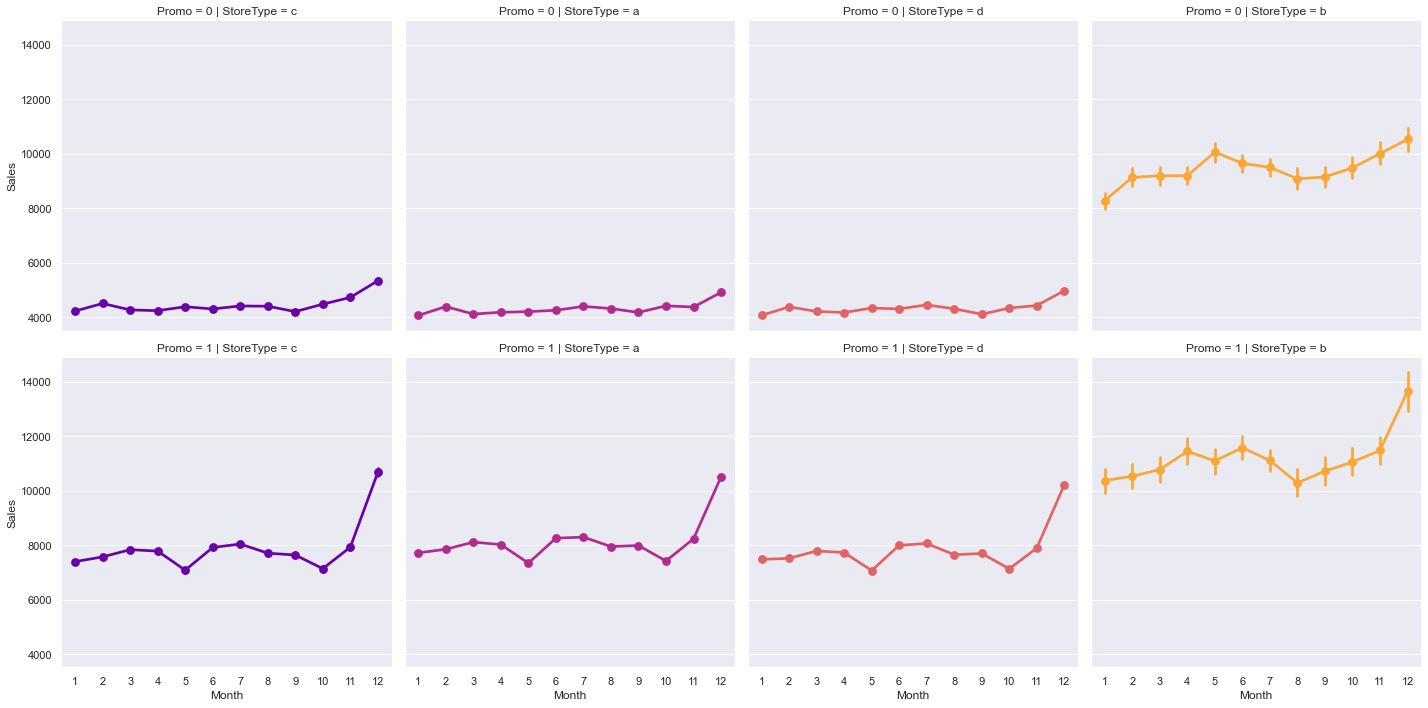

In [51]:
# sales trend  with respect to month 
color="yellow"
sns.factorplot(data = clean_trainScore_df, x = 'Month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = color) 

### Customers Distribution

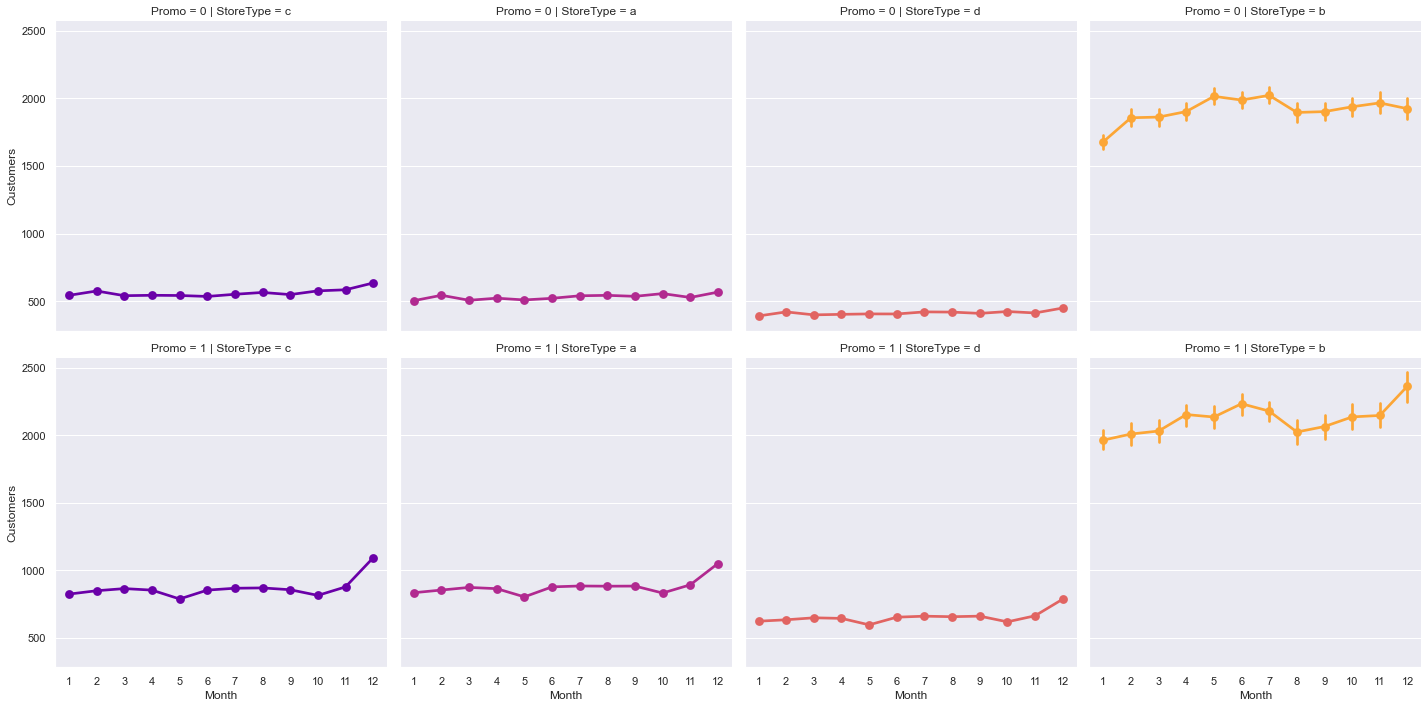

In [52]:
# Customer trends
c="blue"
sns.factorplot(data = train_store, x = 'Month', y = "Customers", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c) 

### Sales escalate towards Christmas holidays

Text(0.5, 1.0, 'Customers Distribution')

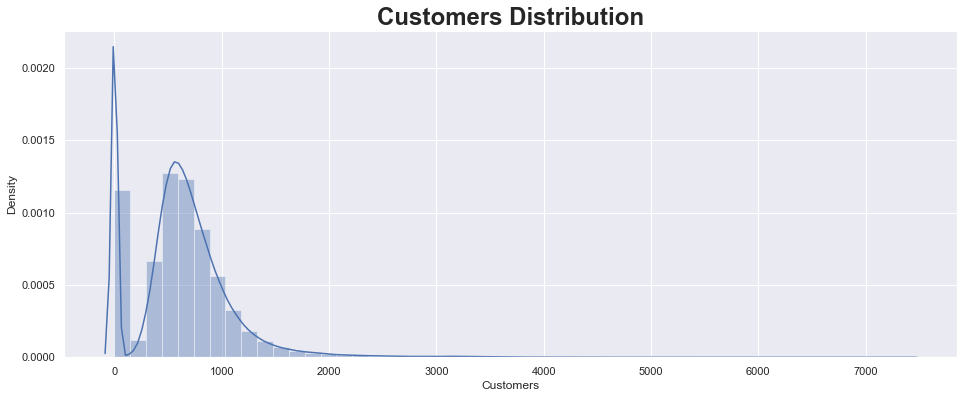

In [61]:
plt.figure(figsize=(16, 6))
sns.distplot(clean_trainScore_df['Customers']).set_title('Customers Distribution',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

#### As it is observed from the above figuers, some outliers are shown in both sales and customers distribuiton

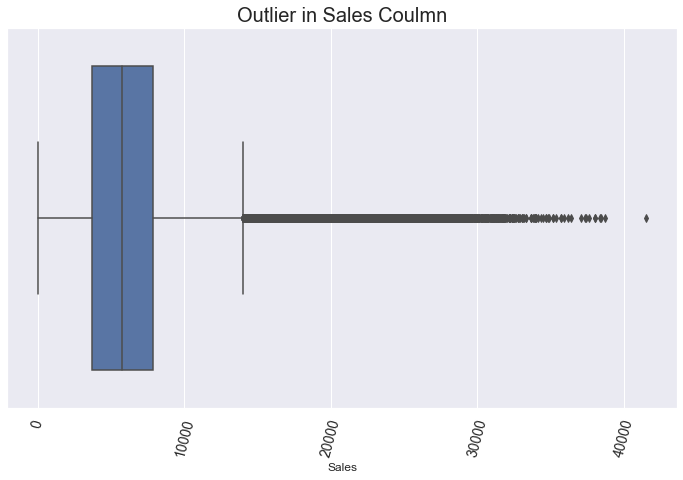

In [62]:
# checking using box plot
plotfunction.plot_box(clean_trainScore_df, 'Sales','Outlier in Sales Coulmn')

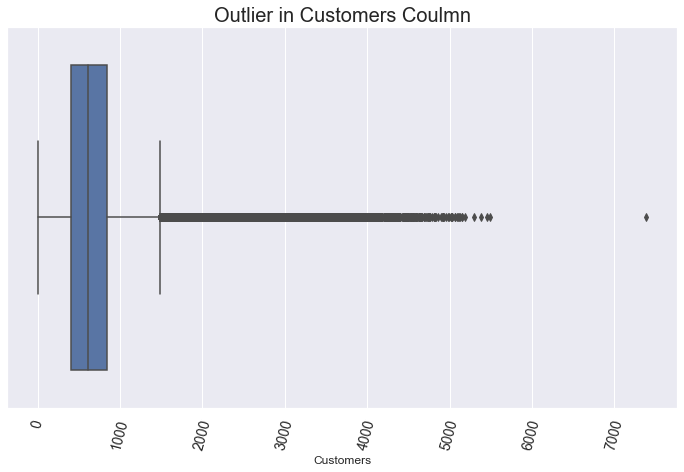

In [84]:
plotfunction.plot_box(clean_trainScore_df, 'Customers','Outlier in Customers Coulmn')

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

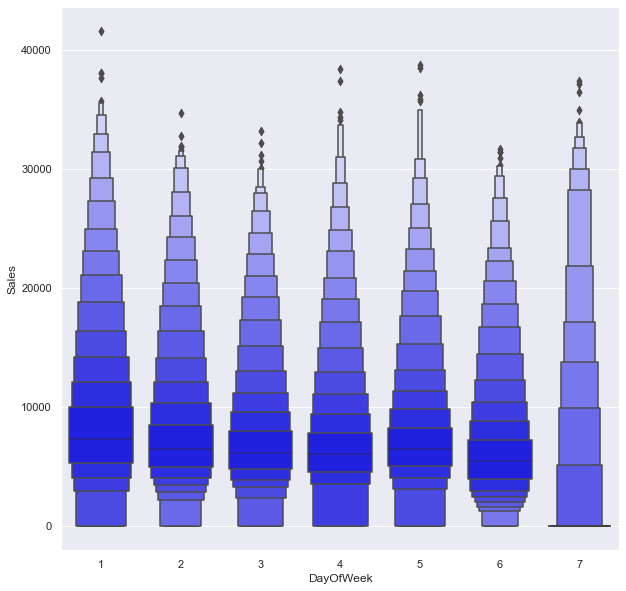

In [63]:
plt.figure(figsize=(10,10))
sns.boxenplot(data=clean_trainScore_df,scale="linear",x="DayOfWeek",y="Sales",color="Blue")

<AxesSubplot:xlabel='DayOfWeek', ylabel='Customers'>

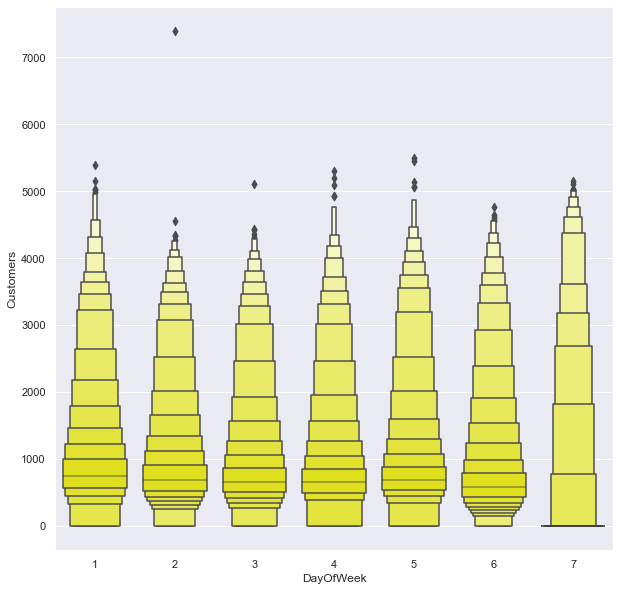

In [55]:
# box boxenplot
plt.figure(figsize=(10,10))
sns.boxenplot(y="Customers", x="DayOfWeek",data=clean_trainScore_df, scale="linear",color="Yellow")

**The data shows outliers, this can be caused due to Holiday or  promotion effect. the outliers need to be handled**

In [24]:
# replacing the outliers with median value
dataPreprocess.replace_outlier_with_median(clean_trainScore_df,'Customers' ) 

In [85]:
dataPreprocess.replace_outlier_with_median(clean_trainScore_df,'Sales' ) 

**DayOfWeek Vs Open distribution**

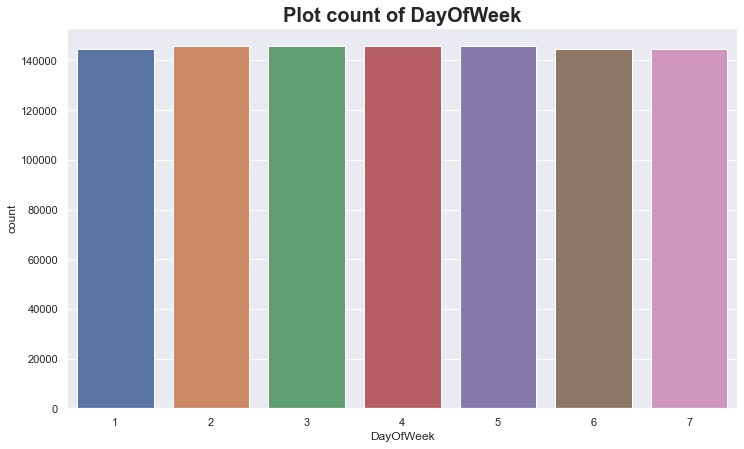

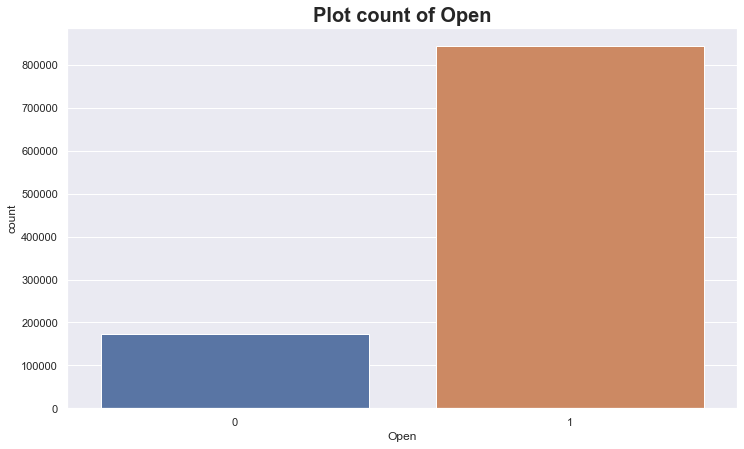

In [86]:
#ploting distribution using plot_count method
plotfunction.plot_count(clean_trainScore_df,'DayOfWeek')
plotfunction.plot_count(clean_trainScore_df, 'Open')

### State Holiday, School Holidays & Promo  distribution

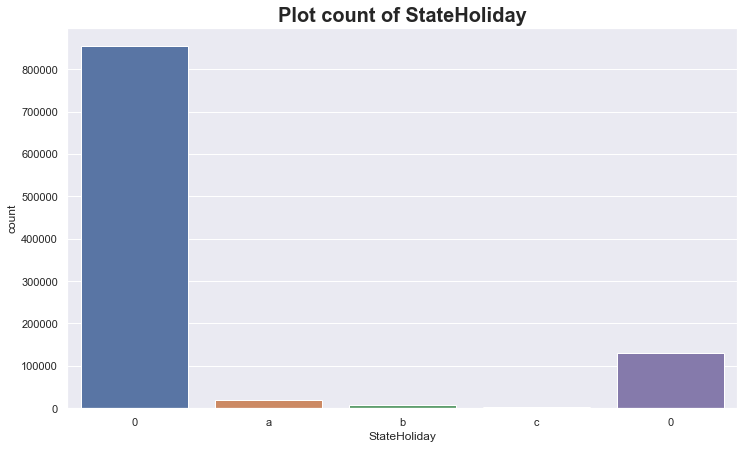

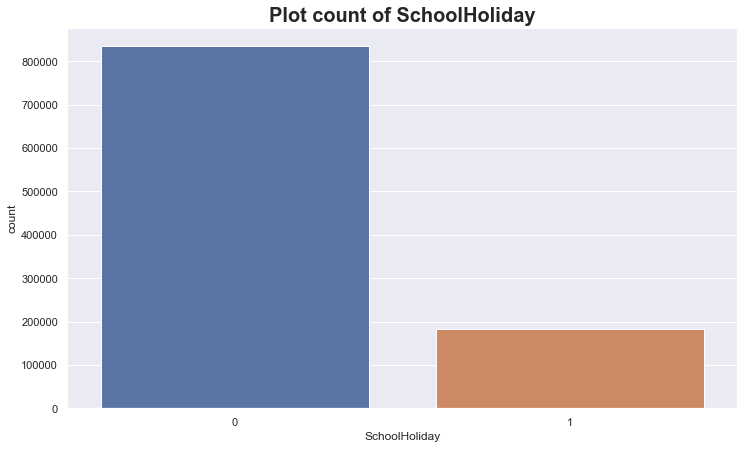

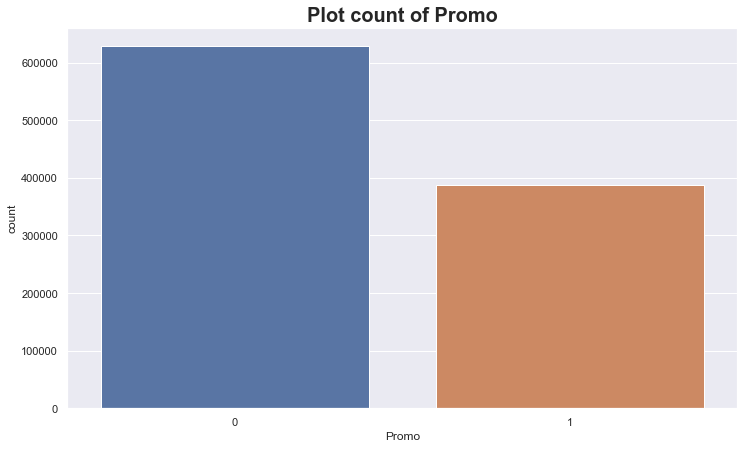

In [87]:
plotfunction.plot_count(clean_trainScore_df, 'StateHoliday')
plotfunction.plot_count(clean_trainScore_df, 'SchoolHoliday')
plotfunction.plot_count(clean_trainScore_df, 'Promo')

**Store distribution**

<Figure size 648x504 with 0 Axes>

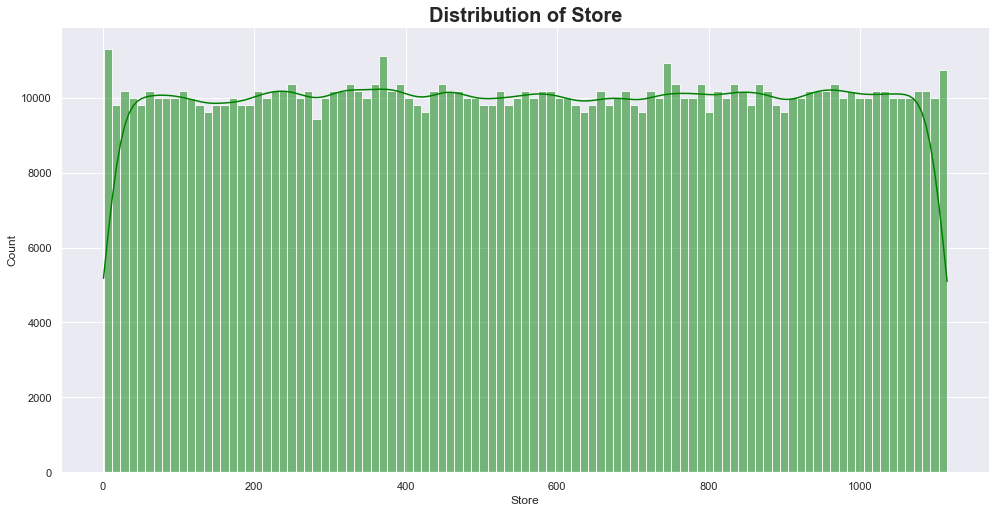

In [88]:
# using plot function
plotfunction.plot_hist(clean_trainScore_df, 'Store', 'green')

**Year, Month & WeekOfYear distribution**

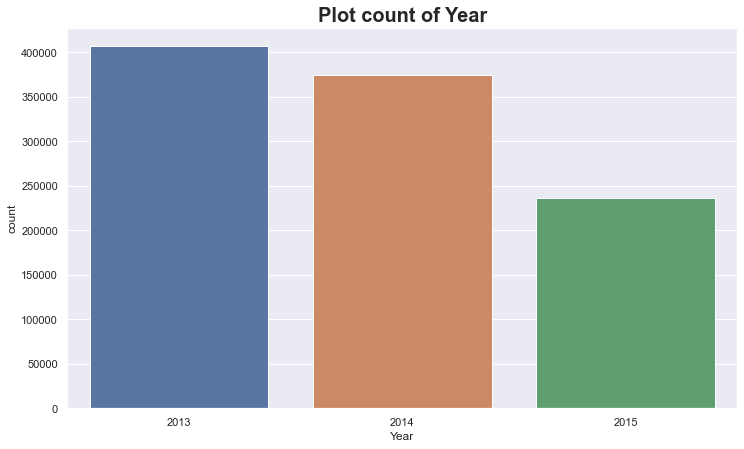

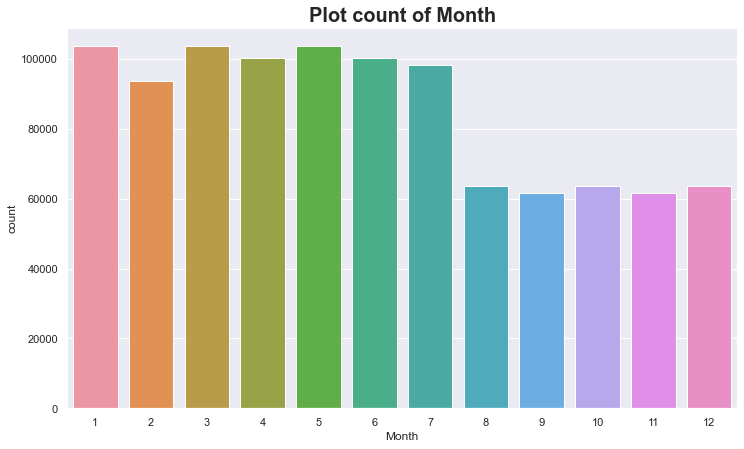

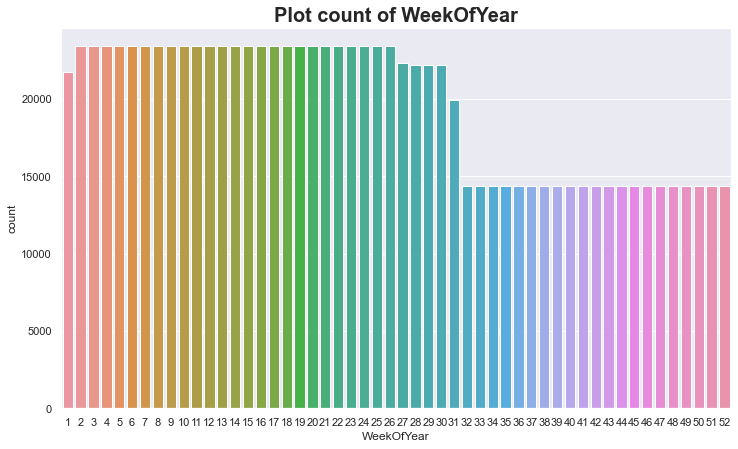

In [29]:
plotfunction.plot_count(clean_trainScore_df, 'Year')
plotfunction.plot_count(clean_trainScore_df, 'Month')
plotfunction.plot_count(clean_trainScore_df, 'WeekOfYear')


 **StoreType, Assortment and Promo2 distribution**

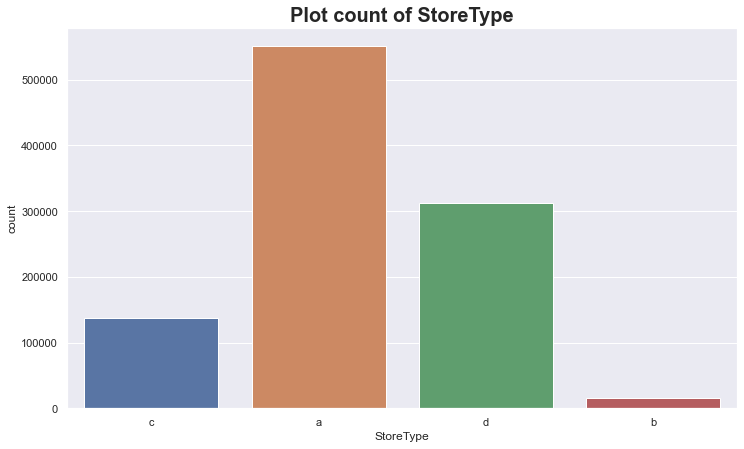

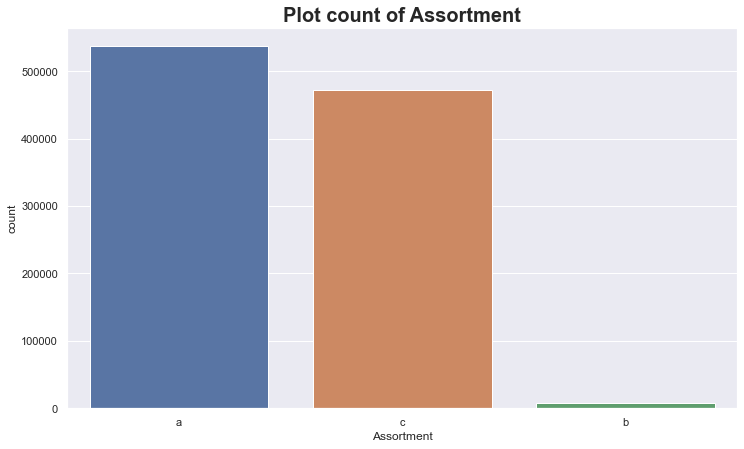

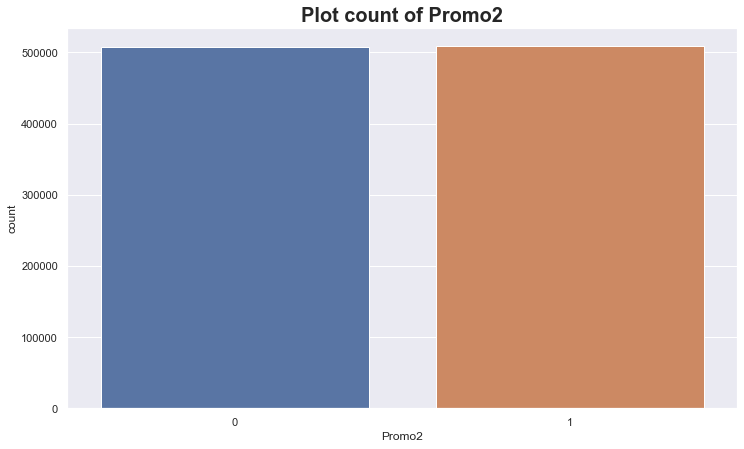

In [30]:
# using plot count
plotfunction.plot_count(clean_trainScore_df, 'StoreType')
plotfunction.plot_count(clean_trainScore_df, 'Assortment')
plotfunction.plot_count(clean_trainScore_df, 'Promo2')

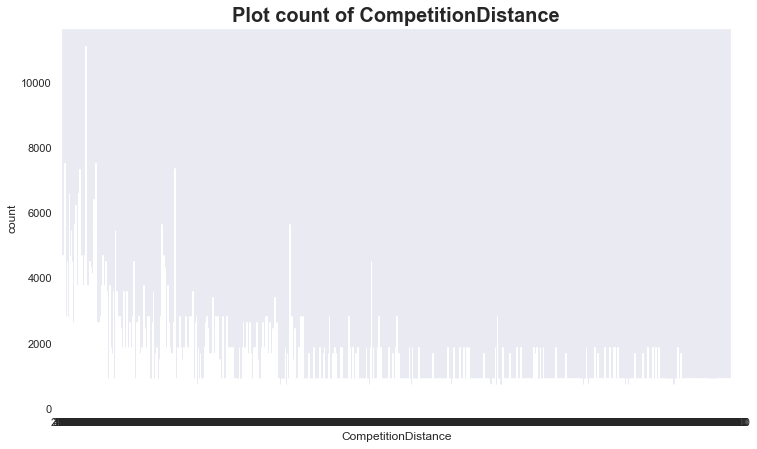

In [89]:
sns.set(style="dark")
plotfunction.plot_count(clean_trainScore_df, 'CompetitionDistance')

__Adding Feature__

Generating new features from already existing features about the customers towards sales.

In [93]:
#Adding salespercustomer column
clean_trainScore_df['SalesperCustomer']=clean_trainScore_df['Sales']/clean_trainScore_df['Customers']

In [94]:
clean_trainScore_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer
0,1,5,5263.0,555,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.482883
1,1,4,5020.0,546,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.194139
2,1,3,4782.0,523,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.143403
3,1,2,5011.0,560,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,8.948214
4,1,1,6102.0,612,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.970588


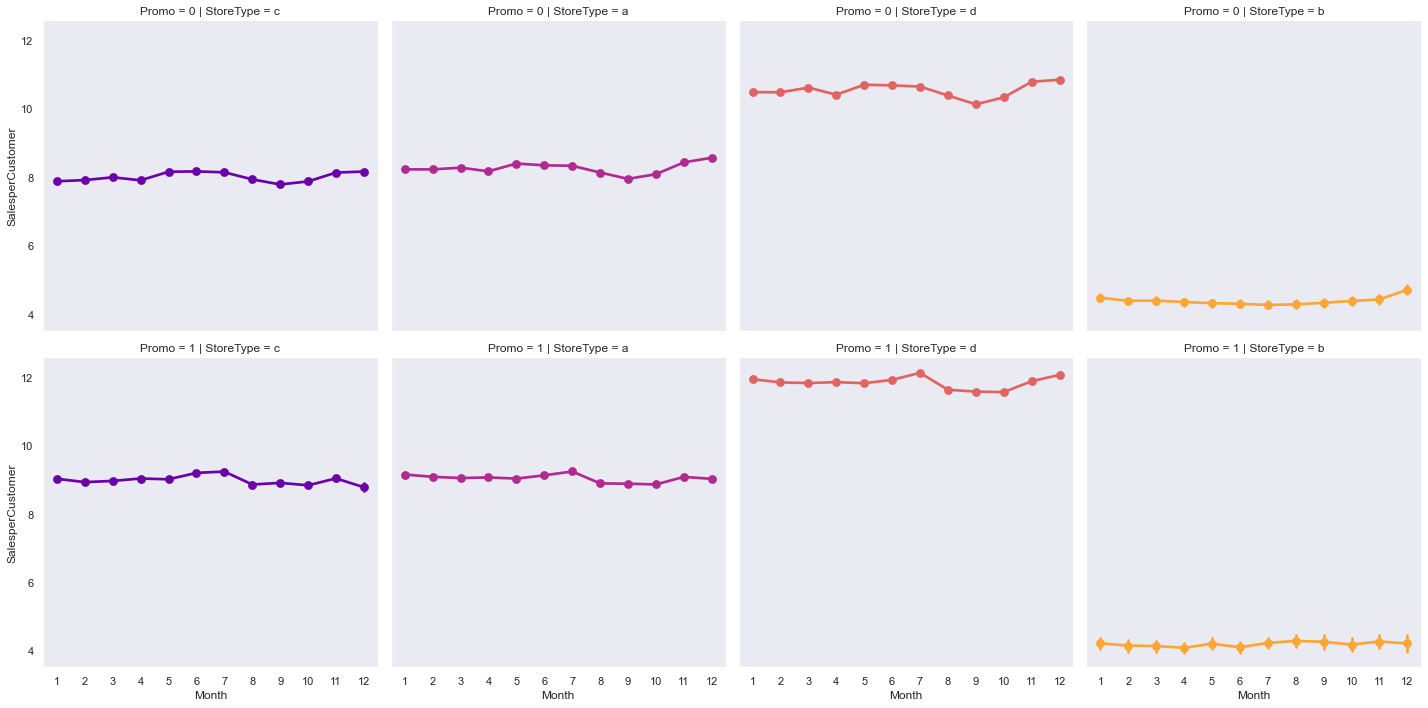

In [95]:
# sale per customer trends
c="green"
sns.factorplot(data = clean_trainScore_df, x = 'Month', y = "SalesperCustomer", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c) 

### correlation Analysis

In [96]:
df_correlation=clean_trainScore_df[['Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo',
        'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'SalesperCustomer', 'Month', 'Year',
       'StateHoliday', 'Assortment', 'StoreType',
       'PromoInterval']]


<AxesSubplot:>

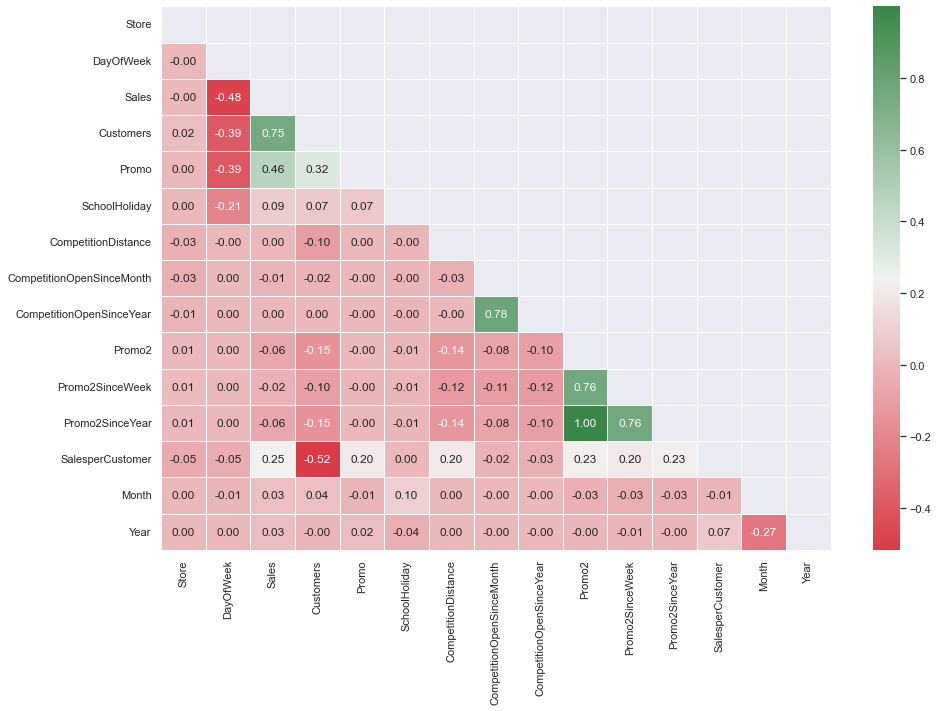

In [97]:
upper_triangle = np.zeros_like(df_correlation.corr(), dtype = np.bool)
upper_triangle[np.triu_indices_from(upper_triangle)] = True #make sure we don't show half of the other triangle
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(df_correlation.corr(),ax=ax,mask=upper_triangle,annot=True, fmt='.2f',linewidths=0.5,cmap=sns.diverging_palette(10, 133, as_cmap=True))


### Some Observation
- The number of Customers and Sales have strong relation
- Positive correlation between the store had a running promotion (Promo equal to 1) and amount of Customers.
- The same negative correlation is observed between the presence of the promotion in the store and the day of a week.

In [98]:
# checking the dataset
clean_trainScore_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer
0,1,5,5263.0,555,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.482883
1,1,4,5020.0,546,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.194139
2,1,3,4782.0,523,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.143403
3,1,2,5011.0,560,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,8.948214
4,1,1,6102.0,612,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.970588


In [99]:
#filling the null value of SalesperCustomer
clean_trainScore_df.SalesperCustomer.fillna(0, inplace = True)

In [100]:
# saving
Version_one = "../data/train.csv"
helper.save_csv(clean_trainScore_df, Version_one)

File Successfully Saved.!!!


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer
0,1,5,5263.0,555,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.482883
1,1,4,5020.0,546,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.194139
2,1,3,4782.0,523,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.143403
3,1,2,5011.0,560,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,8.948214
4,1,1,6102.0,612,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.970588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,4771.0,339,1,0,0,1,2013,1,...,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",14.073746
1017205,1115,5,4540.0,326,1,0,0,1,2013,1,...,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",13.926380
1017206,1115,4,4297.0,300,1,0,0,1,2013,1,...,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",14.323333
1017207,1115,3,3697.0,305,1,0,0,1,2013,1,...,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",12.121311


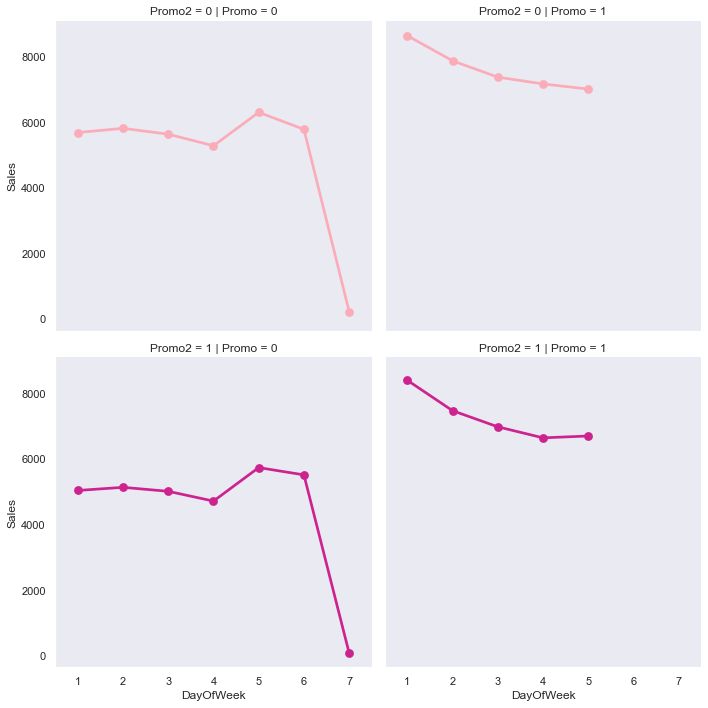

In [101]:
# DayOfWeek vs Sales
sns.factorplot(data = clean_trainScore_df, x = 'DayOfWeek', y = "Sales", 
               col = 'Promo', 
               row = 'Promo2',
               hue = 'Promo2',
               palette = 'RdPu') 

## Observation 

- In case of no promotion, both Promo and Promo2 are equal to 0, Sales tend to down on Sunday (!). 
- On the contrary, stores that run the promotion tend to make most of the Sales on Monday. This fact could be a good - indicator for Rossmann marketing campaigns. The same trend follow the stores which have both promotion at the same time (Promo and Promo2 are equal to 1).
- Promo2 alone doesn't seem to be correlated to any significant change in the Sales amount. This can be also prooved by the blue pale area on the heatmap above

In [ ]:
## reading suing dvc api

In [164]:
def get_data(tag, 
            path='data/train.csv', 
            repo = 'C:/Users/Ekubay/Documents/Rossmann_Pharmaceutical_sales_Prediction'
):
    rev = tag
    data_url = dvc.api.get_url(path=path, repo=repo, rev=rev)
    df = pd.read_csv(data_url)
    return df

In [174]:
clean_trainScore = get_data('ver_3')

In [98]:
df_tests = get_data('ver_4')

In [100]:
df_tests.shape

(41088, 8)

In [99]:
clean_trainScore.shape

(1017209, 23)

In [105]:
%matplotlib inline 

### Answering task 1:

**Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?**


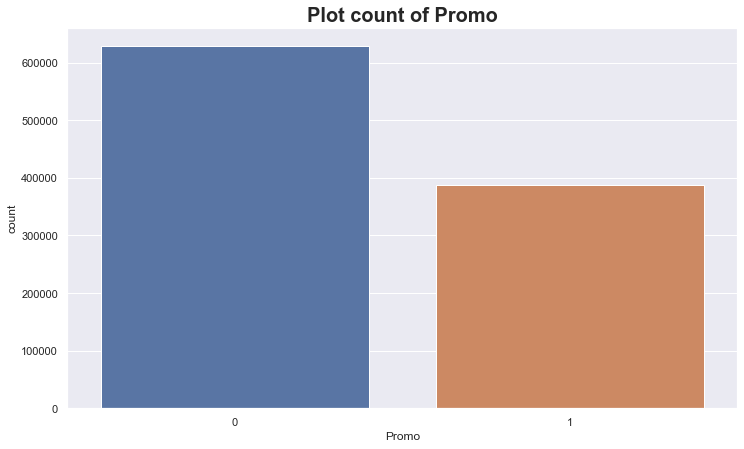

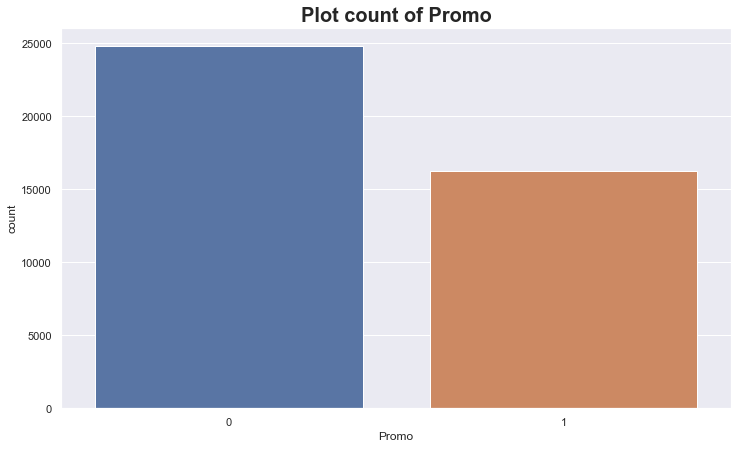

In [95]:
# checking promotions distribution in both datasets
plotfunction.plot_count(clean_trainScore, 'Promo')
plotfunction.plot_count(df_tests, 'Promo')

Observation: 
- The distribution of promo over on training stet is greater than the promo distribution over test set


**Check & compare sales behavior before, during and after holidays**

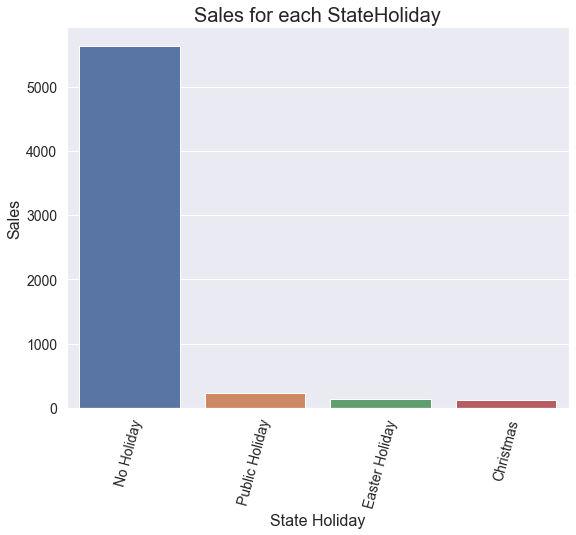

In [106]:
# Sales during, before and after StateHoliday
#plotfunction.plot_subplots(clean_trainScore['StateHoliday'], df_tests['StateHoliday'], 'Train data StateHoliday Distribution', 'Test data StateHoliday Distribution')

# Check & compare sales behavior before, during and after holidays
holiday_df = clean_trainScore.groupby(['StateHoliday'])['Sales'].mean().reset_index()
#holiday_df.head()

# Rename StateHoliday values
holiday_df.replace({'StateHoliday': {'0': 'No Holiday', 'a': 'Public Holiday', 'b': 'Easter Holiday', 'c': 'Christmas'}}, inplace=True)
 #
plotfunction.plot_bar(holiday_df, 'StateHoliday', 'Sales', 'Sales for each StateHoliday', 'State Holiday', 'Sales')

**Observation:**
observing the state holiday of public holiday, Easter Holiday, christmas and no holiday
- There is a very low purchase frequency during holidays 
- high sales after holidaies

**Find out any seasonal (Christmas, Easter etc) purchase behaviors**

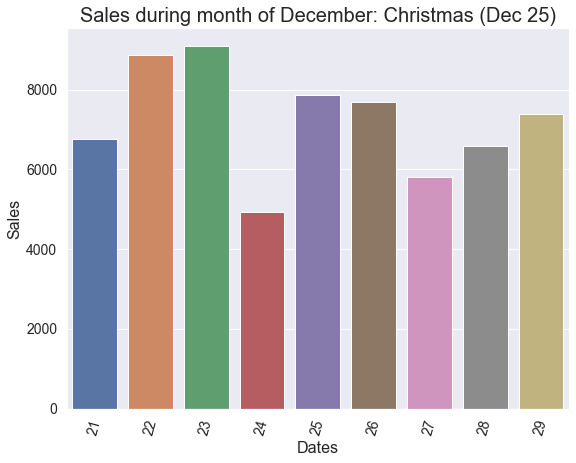

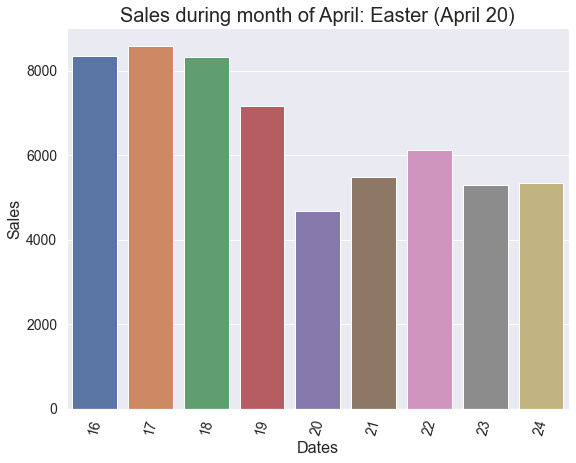

In [113]:
open_store = clean_trainScore[(clean_trainScore.Open == 1) & (clean_trainScore.Year == 2014)]

christmass_month = 12
eastern_month = 4

christmass_month = open_store[open_store.Month == christmass_month]
eastern_month = open_store[open_store.Month == eastern_month]

around_christmas = christmass_month[(christmass_month['Day'] > 20) & (christmass_month['Day'] < 30)]
around_christmas = around_christmas[['Day', 'Sales']].groupby('Day').mean()


around_eastern = eastern_month[(eastern_month['Day'] > 15) & (eastern_month['Day'] < 25)]
around_eastern = around_eastern[['Day', 'Sales']].groupby('Day').mean()

plotfunction.plot_bar(clean_trainScore, around_christmas.index, around_christmas['Sales'], 
                      'Sales during month of December: Christmas (Dec 25)', "Dates", "Sales")
plotfunction.plot_bar(clean_trainScore, around_eastern.index, around_eastern['Sales'], 
                      'Sales during month of April: Easter (April 20)','Dates', 'Sales')

**Observation**
- it shows more sales before the holyday for both 
- it also shows more sales after the Holidays for Easter
- on the holiday, the sales relatively good in chrismass
- on the holiday relatively small in Easter 

**What can you say about the correlation between sales and number of customers?**

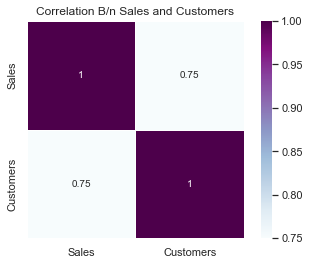

In [101]:
plotfunction.heatmap(clean_trainScore[['Sales', 'Customers']], title='Correlation B/n Sales and Customers')

**Observation:**
- The sales and customer has positive correlation
- As the customer increase the sales increases too

**How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?**

<Figure size 864x504 with 0 Axes>

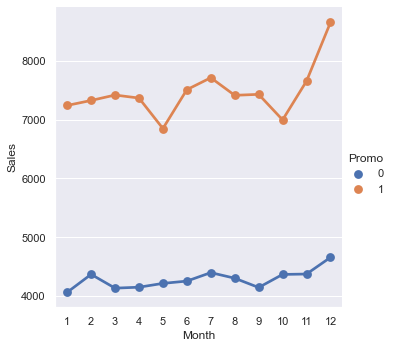

In [43]:
plt.figure(figsize=(12,7))
sns.factorplot(data = clean_trainScore, x ="Month", y = "Sales",
               hue = 'Promo',
              sharex=False)

<Figure size 864x504 with 0 Axes>

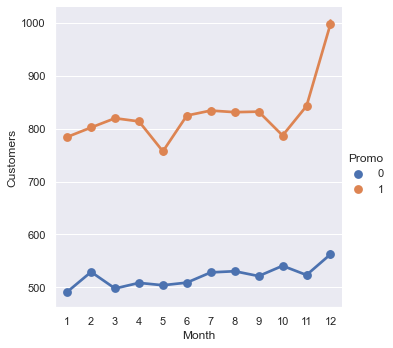

In [42]:
plt.figure(figsize=(12,7))
sns.factorplot(data = clean_trainScore, x ="Month", y = "Customers",
               hue = 'Promo',
              sharex=False)

**Observation**
- the above graph shows working on promotion increases both the sales and customers

**Could the promos be deployed in more effective ways? Which stores should promos be deployed in?**

In [125]:
def plot_hist_2d(df1: pd.DataFrame, df2: pd.DataFrame, x_col: str, y_col: str, title: str, label1, label2) -> None:
        
        sns.set()
        plt.hist(df1[x_col], color='black', alpha=0.3, label=label1)
        plt.hist(df2[y_col], color='red', alpha=0.3, label=label2)
        plt.legend()
        plt.plot()
        plt.title(title, size=20)
        plt.show()

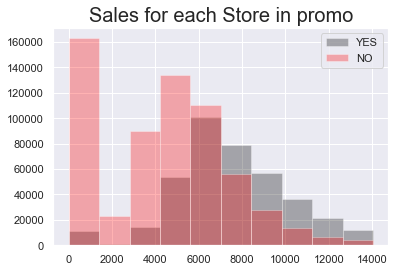

In [129]:
plot_hist_2d(clean_trainScore[clean_trainScore['Promo'] == 1], clean_trainScore[clean_trainScore['Promo'] == 0], 
                  'Sales', 'Sales', 'Sales for each Store in promo', 'YES', 'NO')

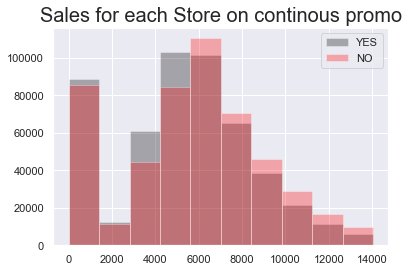

In [128]:
plot_hist_2d(clean_trainScore[clean_trainScore['Promo2'] == 1], clean_trainScore[clean_trainScore['Promo2'] == 0], 'Sales', 
                  'Sales', 'Sales for each Store on continous promo', 'YES', 'NO')

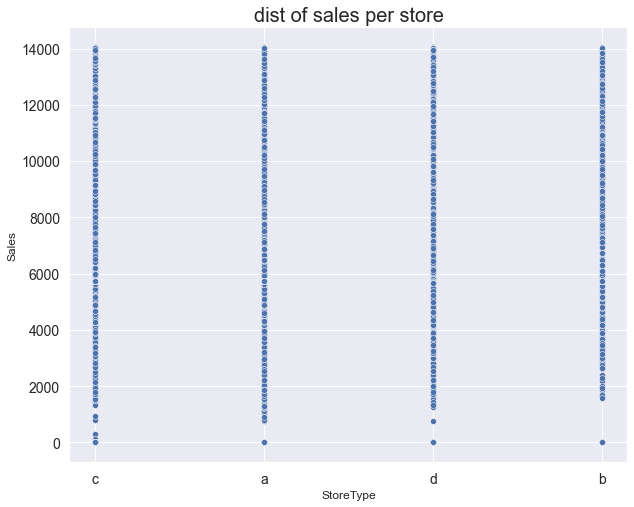

In [114]:
promos_1 = clean_trainScore[clean_trainScore['Promo'] == 1]
plotfunction.plot_scatter(promos_1, 'StoreType', 'Sales', 'dist of sales per store', None , None)


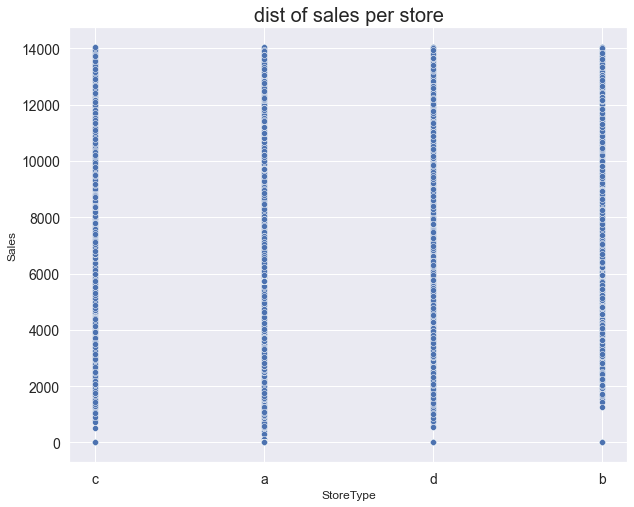

In [115]:
promos_1 = clean_trainScore[clean_trainScore['Promo'] == 0]
plotfunction.plot_scatter(promos_1, 'StoreType', 'Sales', 'dist of sales per store', None , None)

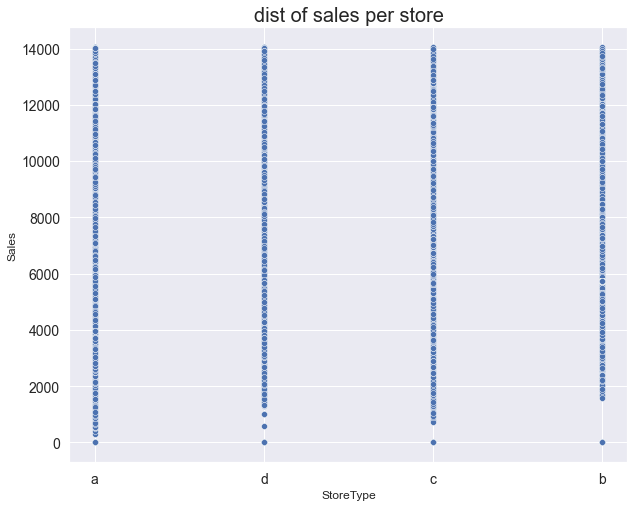

In [116]:
promos_2 = clean_trainScore[clean_trainScore['Promo2'] == 1]
plotfunction.plot_scatter(promos_2, 'StoreType', 'Sales', 'dist of sales per store', None , None)

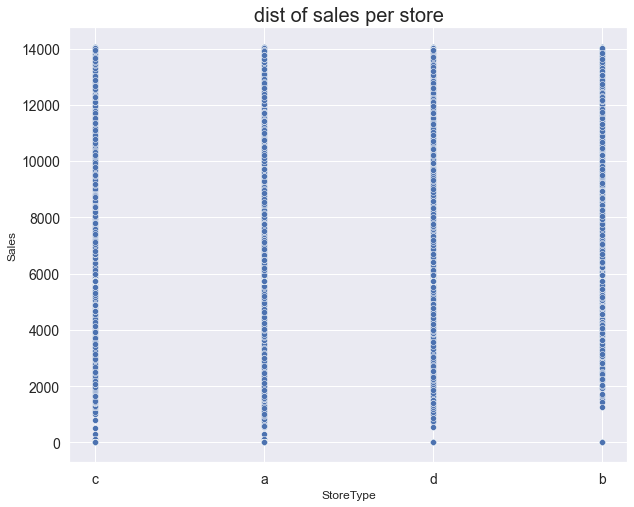

In [117]:
promos_2 = clean_trainScore[clean_trainScore['Promo2'] == 0]
plotfunction.plot_scatter(promos_2, 'StoreType', 'Sales', 'dist of sales per store', None , None)

In [118]:
# store_with_promo = clean_trainScore[clean_trainScore.Promo == 1]
# result = store_with_promo[['Store','Sales', 'Customers']].groupby('Store').agg({"Sales":"mean", 'Customers':'sum'})

# low_sales = result['Sales'].quantile(0.1) 
# small_sales = result[(result['Sales'] <= low_sales)]

# print(f"Number of Stores with less than {low_sales} mean sales are {small_sales.shape[0]}")
# plotfunction.plot_scatter(result, "Store","Sales", 'Stores and average sales on Promotion', hue =None, style = None )

**Observation:** 
- Is shows the promo is effective because, most of the stores sales is grater than the average value.
- Some around 112 stores need especial promotion to increase their income.

**Trends of customer behavior during store open and closing times**

<Figure size 864x504 with 0 Axes>

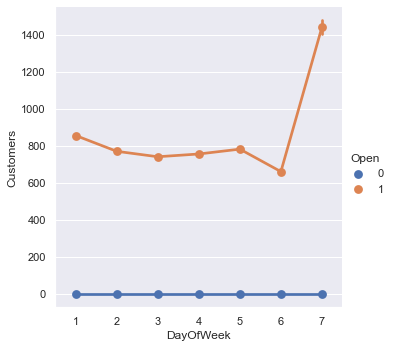

In [61]:
plt.figure(figsize=(12,7))
sns.factorplot(data = clean_trainScore, x ="DayOfWeek", y = "Customers",
               hue = 'Open',
              sharex=False)

**observation**
- Number of customers increase when the store is closed for a little open store especially in the end of week days

**Which stores are opened on all weekdays? How does that affect their sales on weekends?**

In [144]:
open_stores = clean_trainScore.query('Open == 1 and DayOfWeek > 0 and DayOfWeek < 6')

In [145]:
each_day = open_stores[['StoreType', 'Sales','DayOfWeek']].groupby('StoreType').nunique()

In [146]:
each_day.head()

,Sales,DayOfWeek
StoreType,,
a,12478,5
b,5960,5
c,11554,5
d,11968,5


In [147]:
open_store = clean_trainScore.query('Open == 1 and DayOfWeek > 5 or DayOfWeek < 1')

In [149]:
each_day1 = open_store[['StoreType','Sales', 'DayOfWeek']].groupby('StoreType').nunique()

In [150]:
each_day1.head()

,Sales,DayOfWeek
StoreType,,
a,11288,2
b,3081,2
c,7855,1
d,9221,2


**Observation**
- The stores are opened on all weekdays 
- Some stores are even small sales (b)
- Store a is having high income on the weekends 
- The sales on weekends are affecting in reasonable way

**Check how the assortment type affects sales**

INFO:root:util.py - get assortment for value of a
INFO:root:util.py - get assortment for value of b
INFO:root:util.py - get assortment for value of c


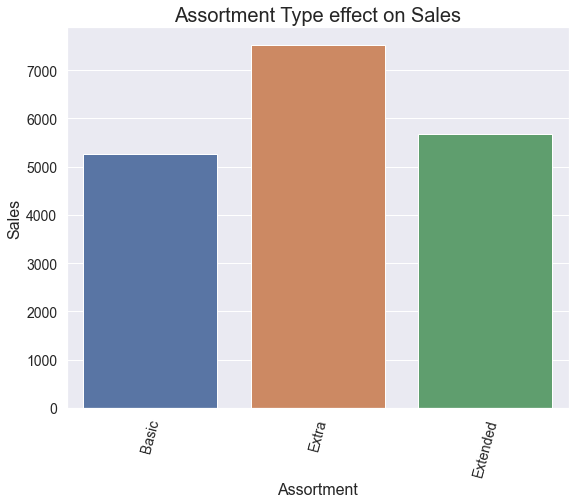

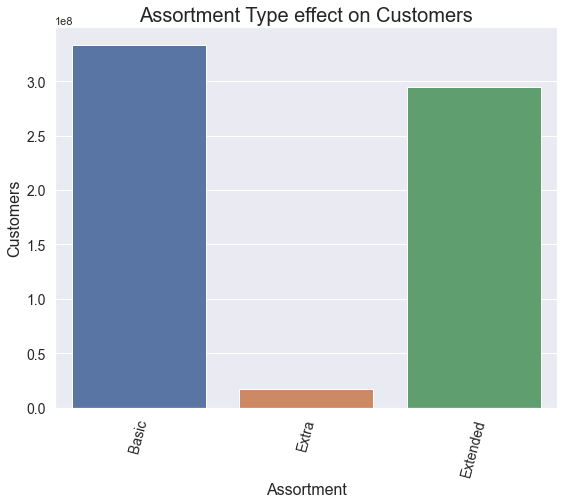

,Assortment,Sales,Customers
0,a,5257.261967,332766938
1,b,7515.126598,16972525
2,c,5682.692067,294302292


In [73]:
assortment = clean_trainScore.groupby('Assortment').agg({'Sales':'mean','Customers':'sum'}).reset_index()
assort_values = [u.get_assortment(x) for x in assortment.Assortment]

plotfunction.plot_bar(clean_trainScore, assort_values, assortment.Sales, title='Assortment Type effect on Sales',
                      xlabel='Assortment',  ylabel='Sales', )
plotfunction.plot_bar(clean_trainScore, assort_values, assortment.Customers, title='Assortment Type effect on Customers',
                      xlabel='Assortment',  ylabel='Customers')
assortment

**Observation:**
- The stores with extra assortment type have high mean sales and lowest customer numbers.

**How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centers, does the distance matter in that case?**

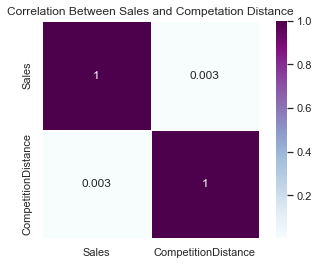

In [74]:
# sales Vs competitioDistance
columns = clean_trainScore[['Sales', 'CompetitionDistance']]
plotfunction.heatmap(columns, title='Correlation Between Sales and Competation Distance')

**observation**
- The more the closer the stores the higher the sales, 
- The more the distant the lower the sales.

**How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on has values for competitor distance**


In [75]:
# checking uniqueness
clean_trainScore["CompetitionOpenSinceYear"].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
          0., 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

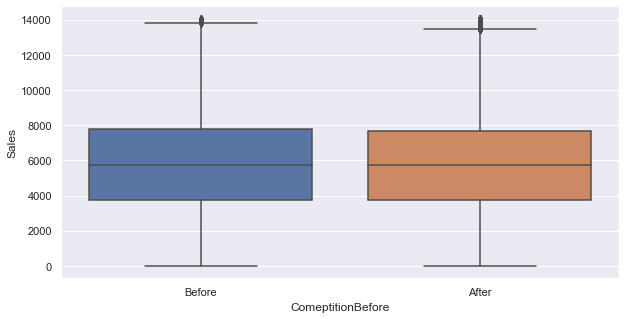

In [84]:
has_open_competition_df = clean_trainScore[clean_trainScore['CompetitionOpenSinceMonth'].notnull()]

has_open_competition_df["CompetitionOpenSinceYear"] = has_open_competition_df["CompetitionOpenSinceYear"].astype("int")
has_open_competition_df["CompetitionOpenSinceMonth"] = has_open_competition_df["CompetitionOpenSinceMonth"].astype("int")


sales_before_competition_open = has_open_competition_df[(has_open_competition_df["Year"] < 
                                                         has_open_competition_df["CompetitionOpenSinceYear"]) & 
                                                        (has_open_competition_df["Month"] < 
                                                         has_open_competition_df["CompetitionOpenSinceMonth"])]

sales_after_competition_open = has_open_competition_df[(has_open_competition_df["Year"] >= 
                                                        has_open_competition_df["CompetitionOpenSinceYear"]) & 
                                                       (has_open_competition_df["Month"] >= 
                                                        has_open_competition_df["CompetitionOpenSinceMonth"])]

sales_before_competition_open["ComeptitionBefore"]="Before"
sales_after_competition_open["ComeptitionBefore"]="After"

competition_sales_data=pd.concat([sales_before_competition_open,sales_after_competition_open])

plt.figure(figsize=(10, 5))
sns.boxplot(x='ComeptitionBefore', y='Sales', data=competition_sales_data);

**observation**
- Number of sales increase when the competitors are opened.

## Summary of the EDA on the Time Series Data
- The most selling and crowded StoreType is A.
- The best "Sale per Customer" StoreType D indicates to the higher Buyer Cart. To benefit from this fact, Rossmann can consider proposing bigger variety of its products.
- Low SalePerCustomer amount for StoreType B indicates to the possible fact that people shop there essentially for "small" things. Eventhough this StoreType generated the least amount of sales and customers over the whole period, it shows a great potential.
- Customers tends to buy more on Modays when there's one promotion (Promo) and on Sundays when there's no promotion at all (both Promo and Promo1 are equal to 0).
- Promo2 alone doesn't seem to be correlated to any significant change in the Sales amount.

## Time Series Analysis

What makes a time series different from a regular regression problem?

- It is time dependent. The basic assumption of a linear regression that the observations are independent doesn’t hold in this case.
- Along with an increasing or decreasing trend, most time series have some form of seasonality trends, i.e. variations specific to a particular time frame. For example, for Christmas holidays, which we will see in this dataset.

it is builted time series analysis on store types instead of individual stores. The main advantage of this approach is its simplicity of presentation and overall account for different trends and seasonalities in the dataset.

### Seasonality
Here are four store types to represent the group:

- Store number 2 for StoreType A
- Store number 85 for StoreType B,
- Store number 1 for StoreType C
- Store number 13 for StoreType D.

We take four stores from store types to represent their group: Store number 2 for StoreType A Store number 85 for StoreType B, Store number 1 for StoreType C Store number 13 for StoreType D. It also makes sense to downsample the data from days to weeks using the resample method to see the present trends more clearly.

In [176]:
# preparation: input should be float type
clean_trainScore['Sales'] = clean_trainScore['Sales'] * 1.0

# store types
sales_a = clean_trainScore[clean_trainScore.Store == 2]['Sales']

sales_b = clean_trainScore[clean_trainScore.Store == 85]['Sales'].sort_index(ascending = True) 
sales_c = clean_trainScore[clean_trainScore.Store == 1]['Sales']
sales_d = clean_trainScore[clean_trainScore.Store == 13]['Sales']


In [178]:
sales_c.head()

0    5263.0
1    5020.0
2    4782.0
3    5011.0
4    6102.0
Name: Sales, dtype: float64

In [179]:
sales_a.head()

942    6064.0
943    5567.0
944    6402.0
945    5671.0
946    6627.0
Name: Sales, dtype: float64

Retail sales for StoreType A and C tend to peak for the Christmas season and then decline after the holidays. We might have seen the same trend for StoreType D (at the bottom) but there is no information from July 2014 to January 2015 about these stores as they were closed.

## Year Trend

In [112]:
# #
# from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# #from fbprophet import Prophet


<AxesSubplot:title={'center':'Store Type D'}>

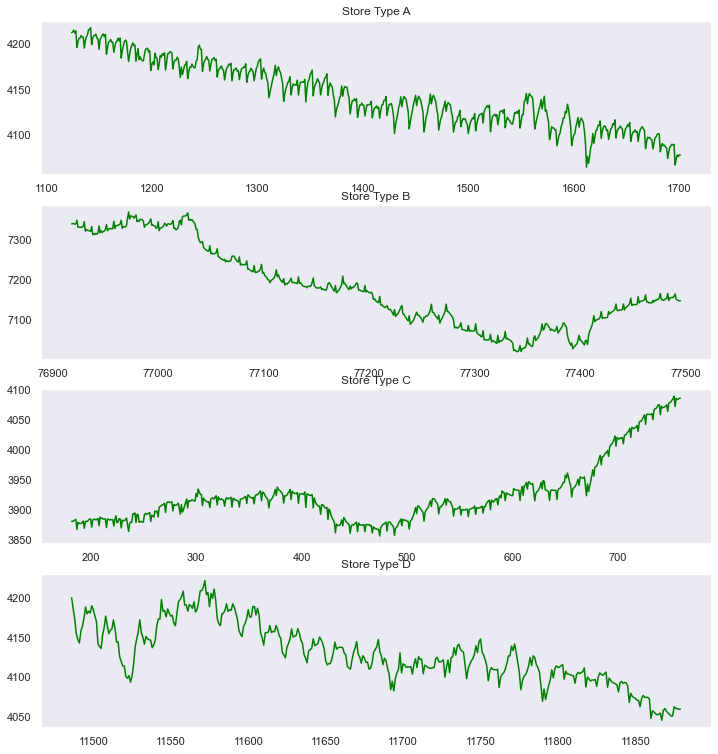

In [113]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

decomposition_a = seasonal_decompose(sales_a, model = 'additive', period = 365)
decomposition_a.trend.plot(color = c, ax = ax1, title="Store Type A")

decomposition_b = seasonal_decompose(sales_b, model = 'additive', period = 365)
decomposition_b.trend.plot(color = c, ax = ax2,title="Store Type B")

decomposition_c = seasonal_decompose(sales_c, model = 'additive', period = 365)
decomposition_c.trend.plot(color = c, ax = ax3,title="Store Type C")

decomposition_d = seasonal_decompose(sales_d, model = 'additive', period = 365)
decomposition_d.trend.plot(color = c, ax = ax4,title="Store Type D")

Observatio0n: Overall sales seems to increase, however not for the StoreType C (a third from the top). Eventhough the StoreType A is the most selling store type in the dataset, it seems that it cab follow the same decresing trajectory as StoreType C did.

## Autocorrelaion
The next step in the time series analysis is to review Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots.

ACF is a measure of the correlation between the timeseries with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’tn’ with series at instant ‘t1-5’…’tn-5’ (t1-5 and tn being end points).

PACF, on the other hand, measures the correlation between the timeseries with a lagged version of itself but after eliminating the variations explained by the intervening comparisons. Eg. at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

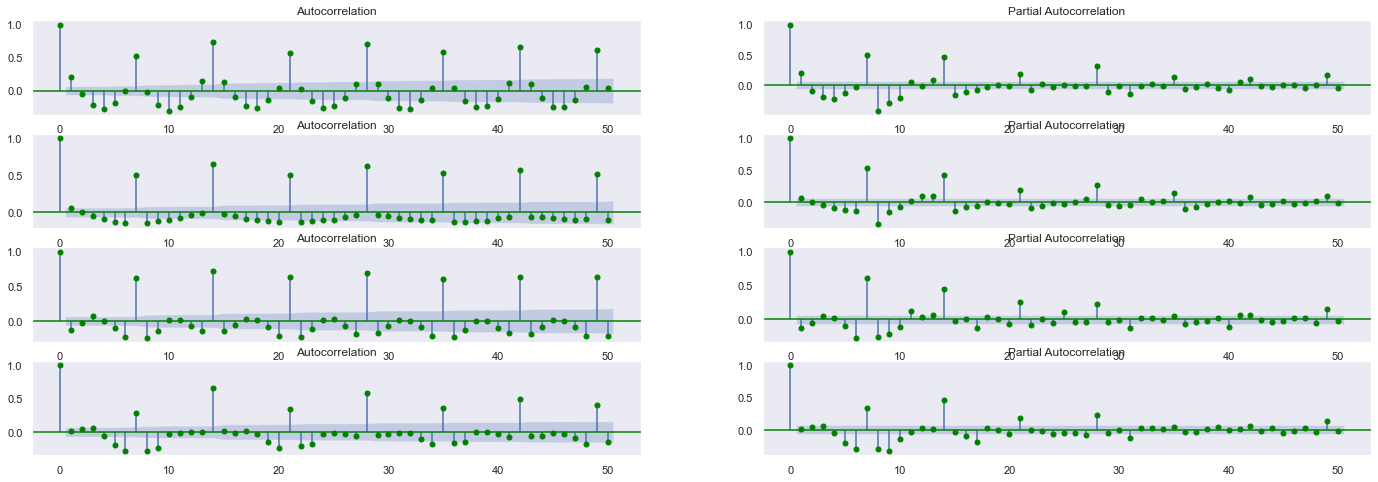

In [91]:
# acf and pacf for A
plt.subplot(421); plot_acf(sales_a, lags = 50, ax = plt.gca(), color = c)
plt.subplot(422); plot_pacf(sales_a, lags = 50, ax = plt.gca(), color = c)

# acf and pacf for B
plt.subplot(423); plot_acf(sales_b, lags = 50, ax = plt.gca(), color = c)
plt.subplot(424); plot_pacf(sales_b, lags = 50, ax = plt.gca(), color = c)

# acf and pacf for C
plt.subplot(425); plot_acf(sales_c, lags = 50, ax = plt.gca(), color = c)
plt.subplot(426); plot_pacf(sales_c, lags = 50, ax = plt.gca(), color = c)

# acf and pacf for D
plt.subplot(427); plot_acf(sales_d, lags = 50, ax = plt.gca(), color = c)
plt.subplot(428); plot_pacf(sales_d, lags = 50, ax = plt.gca(), color = c)

plt.show()

We can read these plots horizontally. Each horizontal pair is for one 'StoreType', from A to D. In general, those plots are showing the correlation of the series with itself, lagged by x time units correlation of the series with itself, lagged by x time units.

There is at two things common for each pair of plots: non randomnes of the time series and high lag-1.

- Type A and type B: Both types show seasonalities at certain lags. For type A, it is each 12th observation with positives spikes at the 12 (s) and 24(2s) lags and so on. For type B it's a weekly trend with positives spikes at the 7(s), 14(2s), 21(3s) and 28(4s) lags.
- Type C and type D: Plots of these two types are more complex. It seems like each observation is coorrelated to its adjacent observations

## Time Series Analysis and Forecasting with Prophet
The Core Data Science team at Facebook recently published a new procedure for forecasting time series data called Prophet. It is based on an additive model where non-linear trends are fit with yearly and weekly seasonality, plus holidays. It enables performing automated forecasting which are already implemented in R at scale in Python 3.

In [24]:
# importing data
df = pd.read_csv('../data/train2.csv',  
                    low_memory = False)

# remove closed stores and those with no sales
df = df[(df["Open"] != 0) & (df['Sales'] != 0)]

# sales for the store number 1 (StoreType C)
sales = df[df.Store == 1].loc[:, ['Date', 'Sales']]

# reverse to the order: from 2013 to 2015
sales = sales.sort_index(ascending = False)

# to datetime64
sales['Date'] = pd.DatetimeIndex(sales['Date'])
sales.dtypes

Date     datetime64[ns]
Sales             int64
dtype: object

In [6]:
# renaming the variables
sales = sales.rename(columns = {'Date': 'ds',
                                'Sales': 'y'})
sales.head()

,ds,y
1014980,2013-01-02,5530
1013865,2013-01-03,4327
1012750,2013-01-04,4486
1011635,2013-01-05,4997
1009405,2013-01-07,7176


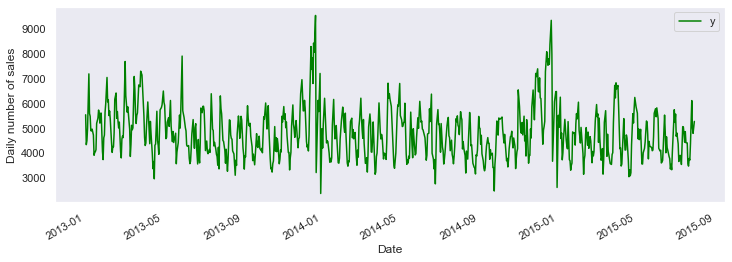

In [121]:
# plot daily sales
ax = sales.set_index('ds').plot(figsize = (12, 4), color = c)
ax.set_ylabel('Daily number of sales')
ax.set_xlabel('Date')
plt.show()

## Modeling Holidays
- The StateHoliday variable in the dataset indicates a state holiday, at which all stores are normally closed. 
- There are also school holidays in the dataset at which ceratin stores are also closing their doors.

In [8]:
# create holidays dataframe
state_dates = df[(df.StateHoliday == 'a') | (df.StateHoliday == 'b') & (df.StateHoliday == 'c')].loc[:, 'Date'].values
school_dates = df[df.SchoolHoliday == 1].loc[:, 'Date'].values

state = pd.DataFrame({'holiday': 'state_holiday',
                      'ds': pd.to_datetime(state_dates)})
school = pd.DataFrame({'holiday': 'school_holiday',
                      'ds': pd.to_datetime(school_dates)})

holidays = pd.concat((state, school))      
holidays.head()

,holiday,ds
0,state_holiday,2015-06-04
1,state_holiday,2015-06-04
2,state_holiday,2015-06-04
3,state_holiday,2015-06-04
4,state_holiday,2015-06-04


**Prophet also allows to model for holidays**
- installing and importing is necessary step

In [14]:
#! pip install prophet
#from fbprophet import Prophet
#import fbprophet

In [15]:
#from prophet import Prophet

In [17]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width = 0.95, 
                   holidays = holidays)
my_model.fit(sales)

# dataframe that extends into future 6 weeks 
future_dates = my_model.make_future_dataframe(periods = 6*7)

print("First week to forecast.")
future_dates.head(5)

In [ ]:
# predictions
forecast = my_model.predict(future_dates)

# preditions for last week
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

Observation: The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [ ]:
fc = forecast[['ds', 'yhat']].rename(columns = {'Date': 'ds', 'Forecast': 'yhat'})


Observation: Prophet plots the observed values of our time series (the black dots), the forecasted values (blue line) and the uncertainty intervals of our forecasts (the blue shaded regions).

In [ ]:
# visualizing predicions
my_model.plot(forecast);

As we see Prophet catches the trends and most of the time gets future values right.

One other particularly strong feature of Prophet is its ability to return the components of our forecasts. This can help reveal how daily, weekly and yearly patterns of the time series plus manyally included holidayes contribute to the overall forecasted values:

In [ ]:
my_model.plot_components(forecast);